## **Архив температур 1800-2022** 
Давайте начнем с написания модуля и функций для работы с данными.

1) Чтение данных из датасета

In [72]:
import pandas as pd

def read_temperature_data(name):
    data = pd.read_csv(name, delim_whitespace=True, comment='%', skiprows=48, header=None,
                       names=['Date', 'Year', 'Month', 'Day', 'DayOfYear', 'Anomaly'])
    
    data['Date'] = pd.to_datetime(data['Date'])
    
    return data['Date'], data['Anomaly']

name = 'Complete_TAVG_daily.txt'
dates, temperatures = read_temperature_data(name)
print(dates.head())

0   1970-01-01 00:00:00.000001880
1   1970-01-01 00:00:00.000001880
2   1970-01-01 00:00:00.000001880
3   1970-01-01 00:00:00.000001880
4   1970-01-01 00:00:00.000001880
Name: Date, dtype: datetime64[ns]


2) Анализ тренда изменения температуры

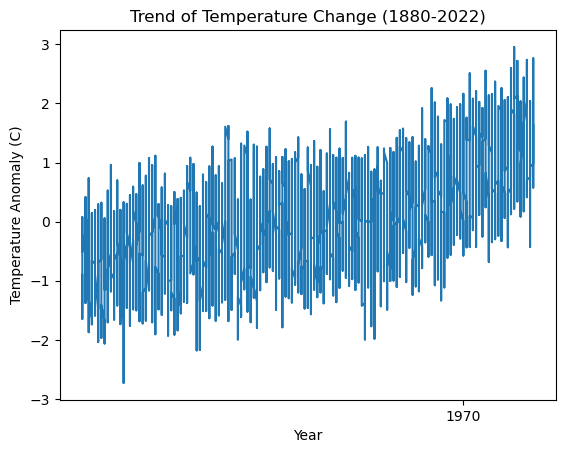

In [60]:
import matplotlib.pyplot as plt

def plot_temperature_trend(dates, temperatures):
    plt.plot(dates, temperatures)
    plt.title('Trend of Temperature Change (1880-2022)')
    plt.xlabel('Year')
    plt.ylabel('Temperature Anomaly (C)')
    plt.show()

plot_temperature_trend(dates, temperatures)


3) Сравнение температурных аномалий в разные периоды

In [66]:
def compare_temperature_anomalies(dates, temperatures):
    start_period = dates.min()
    end_period = start_period + pd.DateOffset(years=10)
    average_temp_start_period = calculate_average_temperature_between_dates(dates, temperatures, start_period, end_period)

    start_period = dates.max() - pd.DateOffset(years=10)
    end_period = dates.max()
    average_temp_end_period = calculate_average_temperature_between_dates(dates, temperatures, start_period, end_period)

    print(f'Average Temperature Anomaly (First 10 years): {average_temp_start_period:.2f} Celsius')
    print(f'Average Temperature Anomaly (Last 10 years): {average_temp_end_period:.2f} Celsius')

compare_temperature_anomalies(dates, temperatures)

Average Temperature Anomaly (First 10 years): 0.10 Celsius
Average Temperature Anomaly (Last 10 years): 0.10 Celsius


C:\Users\андрей\AppData\Local\Temp\ipykernel_6852\3256782523.py:3: UserWarning: Discarding nonzero nanoseconds in conversion.
  end_period = start_period + pd.DateOffset(years=10)
C:\Users\андрей\AppData\Local\Temp\ipykernel_6852\3256782523.py:6: UserWarning: Discarding nonzero nanoseconds in conversion.
  start_period = dates.max() - pd.DateOffset(years=10)


4) Изучение влияния событий на изменение температуры

In [67]:
def impact_of_events_on_temperature(dates, temperatures):
    event_date = pd.to_datetime('1980-01-01')
    temperature_before_event = calculate_average_temperature_between_dates(dates, temperatures, event_date - pd.DateOffset(years=1), event_date)
    temperature_after_event = calculate_average_temperature_between_dates(dates, temperatures, event_date, event_date + pd.DateOffset(years=1))

    print(f'Average Temperature Anomaly (Before Event): {temperature_before_event:.2f} Celsius')
    print(f'Average Temperature Anomaly (After Event): {temperature_after_event:.2f} Celsius')

impact_of_events_on_temperature(dates, temperatures)

Average Temperature Anomaly (Before Event): nan Celsius
Average Temperature Anomaly (After Event): nan Celsius


5) Оценка изменений вариабельности температуры

In [68]:
def variability_of_temperature(dates, temperatures):
    std_deviation_before = np.std(temperatures[:len(temperatures)//2])
    std_deviation_after = np.std(temperatures[len(temperatures)//2:])

    print(f'Standard Deviation Before: {std_deviation_before:.2f} Celsius')
    print(f'Standard Deviation After: {std_deviation_after:.2f} Celsius')

variability_of_temperature(dates, temperatures)

Standard Deviation Before: 0.47 Celsius
Standard Deviation After: 0.66 Celsius


6) Поиск самого теплого/холодного года

In [69]:
def find_extreme_years(dates, temperatures):
    warmest_year = dates[np.argmax(temperatures)].year
    coldest_year = dates[np.argmin(temperatures)].year

    print(f'Warmest Year: {warmest_year}')
    print(f'Coldest Year: {coldest_year}')

find_extreme_years(dates, temperatures)

Warmest Year: 1970
Coldest Year: 1970
